# Assignment 1

In the first problem of the assigment, we need to import the MNIST dataset using tensorflow and display some of the examples of the dataset. The examples are in the form of images of hamdwritten numbers.

The python code below imports the MNIST data-set from tensorflow and show some of the examples from the data-set.

Extracting MNSIT_data/train-images-idx3-ubyte.gz
Extracting MNSIT_data/train-labels-idx1-ubyte.gz
Extracting MNSIT_data/t10k-images-idx3-ubyte.gz
Extracting MNSIT_data/t10k-labels-idx1-ubyte.gz


Example 1


Example 5


Example 10


Example 20


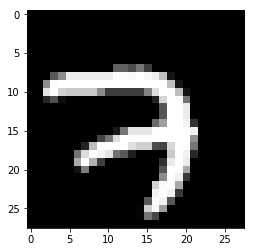

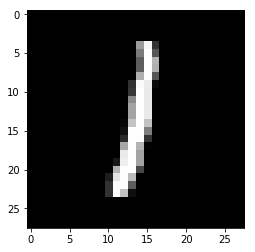

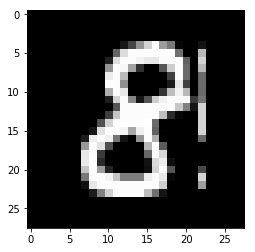

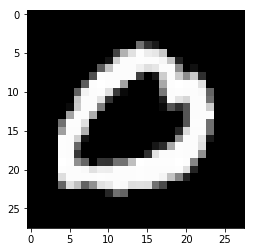

In [29]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt


def show_examples():
    mnsit = input_data.read_data_sets("MNSIT_data/", one_hot=True)
    images = mnsit.train.images[0:50]
#     print("examples 3 to 9", images[3:10])
    print("\n\nExample 1")
    example_1 = plt.figure(1)
    plt.imshow(images[0].reshape([28, 28]), cmap="gray")
#     example_1.show()
    print("\n\nExample 5")
    example_2 = plt.figure(2)
    plt.imshow(images[4].reshape([28, 28]), cmap="gray")
#     example_2.show()
    print("\n\nExample 10")
    example_3 = plt.figure(3)
    plt.imshow(images[9].reshape([28, 28]), cmap="gray")
#     example_3.show()
    print("\n\nExample 20")
    example_4 = plt.figure(4)
    plt.imshow(images[19].reshape([28, 28]), cmap="gray")
#     example_4.show()


show_examples()

***

### Problem 2:

Objective of the second problem is to gain knowledge of Cross-Validation technique used for validating training models. In addition to that, learning to implement the K-fold cross-validation on a given trainig model. lastly, camparision of two learning algoritms SVM and RF is done. 

#### What is Cross Validation?

Cross-validation is a technique used to check overfitting of the trainig data and to know the generalization of the model over unseen independent test data. Several iterations of training and testing is done over validation data and the results show how accurately the model will predict unseen data. 
Among different types of cross validation, K-fold cross-validation is used often in machine learning field.

The pyhton code below makes a implements the K-fold cross-validation on the iris data-set. The results of the cross-validation done by me and the cross-calidation done by the native python implementation from *sklearn* package are then compared. The cross-validation is done for two learning algoirithms, Random Forest and Support Vector Machines. The results from both of the leanrnig alogrithms are then further compared.  

In [30]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# importing the data
iris_data = np.loadtxt("iris.data", delimiter=",")
np.random.seed(10)
np.random.shuffle(iris_data)
print("Shape of the iris data-set : ", iris_data.shape)

# splitting into testing and training data-sets
train_X = iris_data[0::2, 0:4]
train_y = np.int32(iris_data[0::2, 4])
test_X = iris_data[1::2, 0:4]
test_y = np.int32(iris_data[1::2, 4])

# training a SVM classifier
clf1 = svm.SVC(kernel="linear")
clf1.fit(train_X, train_y)

kf = KFold(n_splits=10)
CV_scores_SVM = cross_val_score(clf1, train_X, train_y, cv=kf)

# training a Random Forest Classifier
clf2 = RandomForestClassifier()
clf2.fit(train_X, train_y)

kf = KFold(n_splits=10)
CV_scores_RF = cross_val_score(clf2, train_X, train_y, cv=kf)


# my implementation of cross validation
accuracy_scores_RF = np.array([])
accuracy_scores_SVM = np.array([])
for i in range(20):
    CV_test_X = iris_data[i::10, 0:4]
    CV_test_y = iris_data[i::10, 4]
    CV_train_X = np.array([])
    CV_train_y = np.array([])
    for j in range(10):
        if j == i:
            continue
        if len(CV_train_X) == 0:
            CV_train_X = iris_data[j::10, 0:4]
            CV_train_y = iris_data[j::10, 4]
        else:
            CV_train_X = np.concatenate((CV_train_X, iris_data[j::10, 0:4]), axis=0)
            CV_train_y = np.concatenate((CV_train_y, iris_data[j::10, 4]), axis=0)
    clf = svm.SVC(kernel="linear")
    clf.fit(CV_train_X, CV_train_y)
    CV_predicted_y = clf.predict(CV_test_X)
    accuracy_scores_SVM = np.append(accuracy_scores_SVM, np.mean(CV_test_y == CV_predicted_y))

    clf = RandomForestClassifier()
    clf.fit(CV_train_X, CV_train_y)
    CV_predicted_y = clf.predict(CV_test_X)
    accuracy_scores_RF = np.append(accuracy_scores_RF, np.mean(CV_test_y == CV_predicted_y))

print("\n\n\n***************k-fold Cross-Validation results for k=10****************\n") 
print("Cross validated scores (using SVM) on native implementation : ", np.mean(CV_scores_SVM))
print("Cross validated scores (using RF) on native implementation : ", np.mean(CV_scores_SVM))
print("Cross Validated scores (using SVM) on my implementation : ", np.mean(accuracy_scores_SVM))
print("Cross Validated scores (using RF) on my implementation : ", np.mean(accuracy_scores_RF))


Shape of the iris data-set :  (150, 5)



***************k-fold Cross-Validation results for k=10****************

Cross validated scores (using SVM) on native implementation :  0.9875
Cross validated scores (using RF) on native implementation :  0.9875
Cross Validated scores (using SVM) on my implementation :  0.9864285714285714
Cross Validated scores (using RF) on my implementation :  0.9697619047619048


The results of 10 fold cross-validation on the native implementation of *cross_val_score()* on SVM is quite close to my implementation of the cross-validation (k=10).

The cross validated accuracies of Random Forest and Support vector machines are same in the native implementation and quite close to each other in my implementation. These kind of results may have been because of the small amount of trainig data while we were using the native implemention of cross-validation. The data was split into 1:1 ratio making less examples available for trainig the models. In my implementation, the result show that SVM performs better than RF. Random Forest works well with both binary and multiclass classification, that explains it's good results for this perticular problem. 
Support vector machines are good for problems with binary class classification, while support for multiclass can be implemented using one-vs-one scheme. Since there are only three classes, SVM works pretty well here too. 

From my point of view, SVM is a better algorithm for this kind of problem because this this algorithm when used with a linear kernel is less prone to overfitting. while Random forest tends to overfit the training data when the data is very less.

****

### Problem 3:

In this problem I used a Random forest classifier to train the model and make prediction. For improving the model, standardization of the data is done before feeding the data to learning algorithm. Standardization zeros out the mean of the data and sread the data around the mean in small range of standard deviation. This helps to make the attributes comparable to each other.
I used Random forest classifier for this problem because of the robustness of the algorithm. Random Forest generalizes well with the unseen data due to being less prone to overfitting. A well prepared data can be very usefull while using random forest because it helps in better decisions in the trees created. 
This Random Forest implementation is set for 200 trees and use of only two features for splitting at each tree creation stage. The maximum depth of a tree can go upto 100 levels. 

The python code below trains a Rnadom forest model on trainig data and makes prediction on testing data provided. The predicted labels are stored in the *predicted_labels.csv*. 

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# load the data
train_data = np.loadtxt("wine.train", delimiter=",")
np.random.seed(10)
np.random.shuffle(train_data, )
test_data = np.loadtxt("wine.test", delimiter=",")
# X_train, X_test, y_train, y_test = train_test_split(data[:, 1:13], data[:, 0], test_size=0.3, random_state=10)
X_train, X_test, y_train = train_data[:, 1:13], test_data[:, 1:13], train_data[:, 0]

# standardising the data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

# training the classifier and making predictions
clf = RandomForestClassifier(n_estimators=200, max_features=2, max_depth=100, random_state=10)
clf.fit(X=X_train, y=y_train)
predicted_labels = clf.predict(X_test)
np.savetxt("predicted_labels.csv", predicted_labels, delimiter=",")
print(predicted_labels)

[3. 1. 2. 1. 1. 2. 2. 3. 3. 3. 1. 1. 3. 3. 1. 1. 1. 2. 2. 3. 2. 1. 1. 2.
 1. 1. 2. 2. 1. 1. 1. 3. 1. 2. 3. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 3.
 3. 2. 3. 2. 2. 2. 2. 1. 1. 3.]
